# Full mesh Square
Since in my previous python script the kernel kept dying I decided to start a new script with just the full mesh. All the parts about installing Pyvista and the example trials can be left out. 

In [1]:
import numpy as np
import pyvista as pv

# Importing the SU2 file

In [2]:
f = open('C:\\Users\\20192167\\Documents\\Boeken\\BEP\\mesh_channel_256x128.su2.txt', 'r')


# first get the dimensions
line = f.readline()
columns = line.split()
print(columns)

NDIME = columns[1]
print("dimensions = ",NDIME)

# then, get the nr of elements
line = f.readline()
columns = line.split()

NELEM=columns[1]
print("nr of elements=",NELEM)

# create the 2D square array
connectivity = np.arange(5*int(NELEM),dtype=np.int32)
connectivity = connectivity.reshape(int(NELEM),5)
                    
# now, read all the elements into a structure
for i in range(int(NELEM)):
    line=f.readline()
    columns = line.split()
    connectivity[i][:]=[int(4), int(columns[1]), int(columns[2]), int(columns[3]), int(columns[4])]
    
print("end reading elements")
# then, get the coordinates
line = f.readline()
columns = line.split()

NPOIN=columns[1]
print("nr of points=",NPOIN)

# create the 3D point array
points = np.arange(2*int(NPOIN),dtype=np.float64).reshape(int(NPOIN),2)
# now, read all the points into a structure
for i in range(int(NPOIN)):
    line=f.readline()
    columns = line.split()
    points[i][0]=float(columns[0])
    points[i][1]=float(columns[1])

# now, read the markers
line = f.readline()
columns = line.split()

NMARK=columns[1]
print("nr of markers=",NMARK)

# name of the marker (list of strings)
markername = []
# number of elements in the marker (list of integers)
markerelements = np.arange(int(NMARK),dtype=np.int32)
# this is the list of numpy arrays
markers = []

# list of marker points
markerpointslist = []

for m in range(int(NMARK)):
    line = f.readline()
    columns = line.split()
    markername.append(columns[1])
    print(" ",m,": marker name=",markername[m])
    line = f.readline()
    columns = line.split()
    markerelements[m] = int(columns[1])   
    print(" marker elements=",markerelements[m])
    markerarray = np.arange(2*int(markerelements[m])).reshape(int(markerelements[m]),2)

    for i in range(int(markerelements[m])):
        line=f.readline()
        columns = line.split()
        markerarray[i][0]=columns[1]
        markerarray[i][1]=columns[2]
        
    # now add the array to the list of markers
    markers.append(markerarray)

print("Finished reading su2 file.")    


['NDIME=', '2']
dimensions =  2
nr of elements= 32385
end reading elements
nr of points= 32768
nr of markers= 4
  0 : marker name= inlet
 marker elements= 127
  1 : marker name= lower_wall
 marker elements= 255
  2 : marker name= outlet
 marker elements= 127
  3 : marker name= upper_wall
 marker elements= 255
Finished reading su2 file.


In [3]:
markers0 = markers

In [4]:
connectivity

array([[    4,     0,     1,   257,   256],
       [    4,     1,     2,   258,   257],
       [    4,     2,     3,   259,   258],
       ...,
       [    4, 32508, 32509, 32765, 32764],
       [    4, 32509, 32510, 32766, 32765],
       [    4, 32510, 32511, 32767, 32766]])

In [5]:
points

array([[0.        , 0.        ],
       [0.01      , 0.        ],
       [0.01990219, 0.        ],
       ...,
       [2.98011061, 1.        ],
       [2.99      , 1.        ],
       [3.        , 1.        ]])

# Visualizing the mesh

In [6]:
#points0 = []
#for x in range(0,len(points)):
#    if points[x][1] ==0:
#        points0.append(points[x])
#points0

In [7]:
n = int(NPOIN)
z = np.zeros((n, 1))
p = np.append(points, z, axis=1)
points= p
points

array([[0.        , 0.        , 0.        ],
       [0.01      , 0.        , 0.        ],
       [0.01990219, 0.        , 0.        ],
       ...,
       [2.98011061, 1.        , 0.        ],
       [2.99      , 1.        , 0.        ],
       [3.        , 1.        , 0.        ]])

C:\Users\20192167\Anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:60: UserWarning: Failed to use notebook backend: 

Please install `ipyvtklink` to use this feature: https://github.com/Kitware/ipyvtklink

Falling back to a static output.
  warnings.warn(f'Failed to use notebook backend: \n\n{e}\n\n'


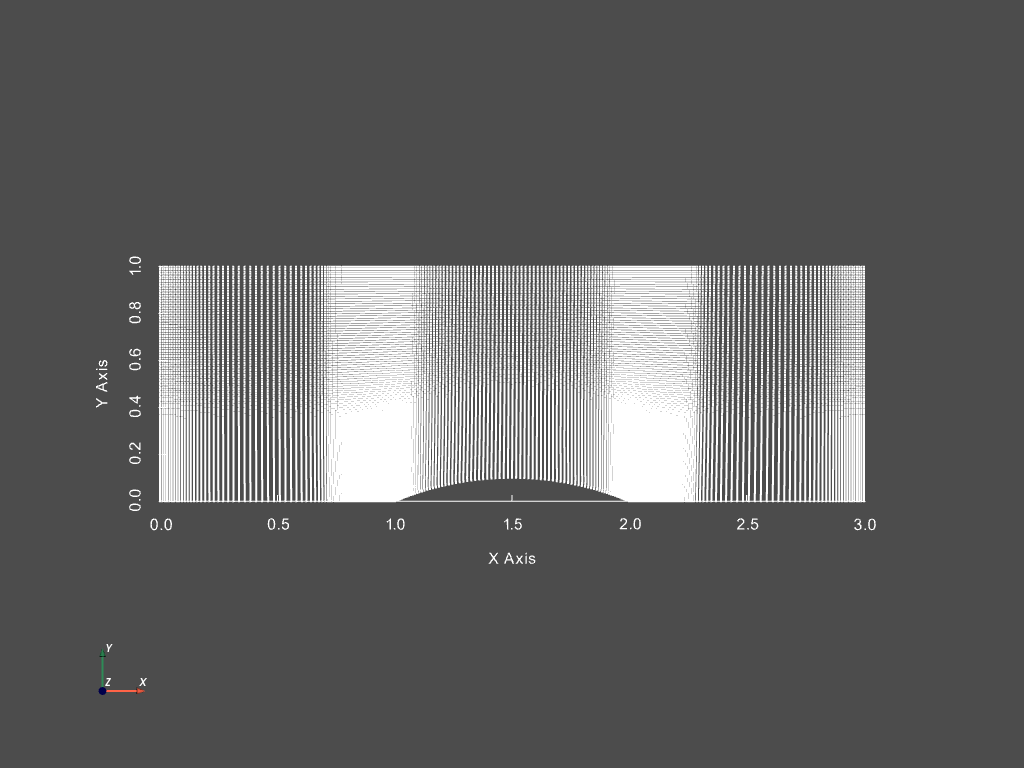

In [8]:
mesh = pv.PolyData(p)
mesh.plot(show_bounds=True, cpos='xy', point_size=2)

In [9]:
n = int(NELEM)
f = np.ones((n, 1)) *4
cells = np.append(f, connectivity, axis=1)
cells

array([[4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00, 2.5700e+02,
        2.5600e+02],
       [4.0000e+00, 4.0000e+00, 1.0000e+00, 2.0000e+00, 2.5800e+02,
        2.5700e+02],
       [4.0000e+00, 4.0000e+00, 2.0000e+00, 3.0000e+00, 2.5900e+02,
        2.5800e+02],
       ...,
       [4.0000e+00, 4.0000e+00, 3.2508e+04, 3.2509e+04, 3.2765e+04,
        3.2764e+04],
       [4.0000e+00, 4.0000e+00, 3.2509e+04, 3.2510e+04, 3.2766e+04,
        3.2765e+04],
       [4.0000e+00, 4.0000e+00, 3.2510e+04, 3.2511e+04, 3.2767e+04,
        3.2766e+04]])

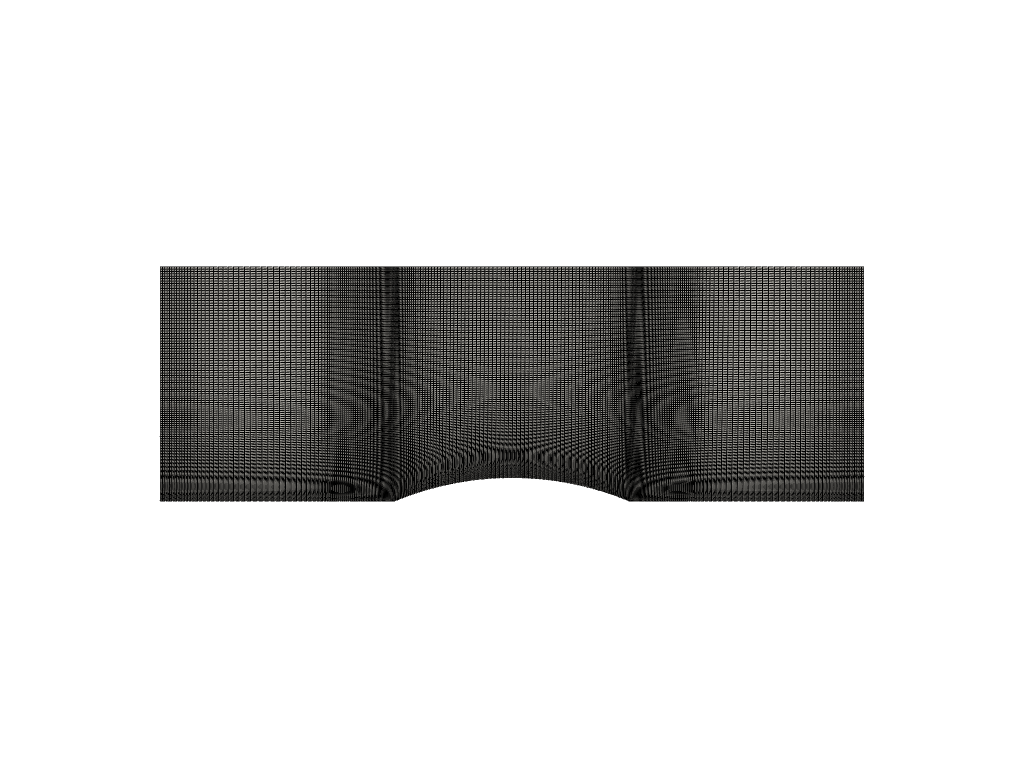

In [10]:
mesh = pv.PolyData(points, connectivity)
pl = pv.Plotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.05, color='#EEEEEE')
pl.set_background('white')
#pl.add_point_labels(points, [f'Point {i}' for i in range(5)],always_visible=True,
#                    font_size=20,text_color='white', point_size=20,point_color='red',render_points_as_spheres=True)
pl.camera_position = 'xy'
pl.show()

In [11]:
cells=connectivity
c = [2,8,200,14,16,4000,4001,800] #index numbers of the cell you wish to refine
      
#-------------------------------------------------------------------------------#    
#--------Finding the neighbouring cells of the cells you wish to refine---------#
#-------------------------------------------------------------------------------#

len_points = len(points) #the total number of points in the mesh
len_cells = len(cells) #the total number of cells in the mesh

clen = len(c) #the total number of cells you wish to refine
ytotal = []  #numbers of the neigbouring cells of all cells you wish to refine in array per cell
ytotaly = [] #numbers of the neigbouring cells of all cells you wish to refine
cells1 = [[0,0,0,0]]

for cx in range(0,clen): #for every cell listed in array {c}

    d1 = cells[c[cx]][1] 
    d2 = cells[c[cx]][2]
    d3 = cells[c[cx]][3]
    d4 = cells[c[cx]][4]
    cy=[d1,d2,d3,d4] #the numbers of the points creating the cell

    y = [] #numbers of the neighbouring cells of cell cx
    v = 0 #temporary variable

    for x in range(0,len_cells): #for all cells in the mesh
        if d1 in cells[x][1:] and d2 in cells[x][1:]: #looks for the side DE in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if d2 in cells[x][1:] and d3 in cells[x][1:]: #looks for the side EF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if d3 in cells[x][1:] and d4 in cells[x][1:]: #looks for the side DF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1   
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    v=0
    for x in range(0,len_cells): #for all cells in the mesh
        if d4 in cells[x][1:] and d1 in cells[x][1:]: #looks for the side DF in the other cells
            if x not in c:
                y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                ytotaly.append(x)
                v=1   
    if v!= 1:
        y.append(len_cells+1+3*len(c)) #adds a cell that is not in the mesh to the array {y}
        ytotaly.append(len_cells+1+3*len(c))
        
    ytotal.append(y)
    
#-------------------------------------------------------------------------#
#---------Finding neighbouring cells that are called for twice------------#
#-------------------------------------------------------------------------#
i=0
clen= len(c)
for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
    for z in range(0,4):
        if ytotal[x][z] in ytotaly[4+i:]: #if the cell is listed again in {ytotal}
            if ytotal[x][z] != len_cells+1+3*clen: #if it is not the additional cell added for no connection
                if ytotal[x][z] not in c: #if the cell is not listed in {c}
                    c.append(ytotal[x][z]) #add the cell to {c}
                    v =1
            else:
                v=0
        else:
            v=0

    i = i+4
    
if len(c)==clen: #if at least two cells share the same neighbouring cell. The code will be ran again.
    a=1
    
else:
    while True:
        clen=len(c) #the new total number of cells you wish to refine
        ytotal = [] #numbers of the neigbouring cells of all cells you wish to refine
        ytotaly= []
        #-------------------------------------------------------------------------------#    
        #--------Finding the neighbouring cells of the cells you wish to refine---------#
        #-------------------------------------------------------------------------------#

        for cx in range(0,clen): #for every cell listed in array {c}
            d1 = cells[c[cx]][1] 
            d2 = cells[c[cx]][2]
            d3 = cells[c[cx]][3]
            d4 = cells[c[cx]][4]
            cy=[d1,d2,d3,d4] #the numbers of the points creating the cell

            y = [] #numbers of the neighbouring cells of cell cx
            v = 0 #temporary variable

            for x in range(0,len_cells): #for all cells in the mesh
                if d1 in cells[x][1:] and d2 in cells[x][1:]: #looks for the side DE in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)
                    
            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if d2 in cells[x][1:] and d3 in cells[x][1:]: #looks for the side EF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)

            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if d3 in cells[x][1:] and d4 in cells[x][1:]: #looks for the side DF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1   
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)

            v=0
            for x in range(0,len_cells): #for all cells in the mesh
                if d4 in cells[x][1:] and d1 in cells[x][1:]: #looks for the side DF in the other cells
                    if x not in c:
                        y.append(x) #if a second listing of DF is present the number of that cell is added to the list
                        ytotaly.append(x)
                        v=1   
            if v!= 1:
                y.append(len_cells+1+3*clen) #adds a cell that is not in the mesh to the array {y}
                ytotaly.append(len_cells+1+3*clen)
                    
            ytotal.append(y)

        #-------------------------------------------------------------------------#
        #---------Finding neighbouring cells that are called for twice------------#
        #-------------------------------------------------------------------------#

        i=0
        for x in range (0,len(ytotal)): #for every cell listed in {ytotal}
            for z in range(0,4): 
    
                if ytotal[x][z] in ytotaly[4+i:]: #if the cell is listed again in {ytotal}
                    if ytotal[x][z] != len_cells+1+3*clen: #if it is not the additional cell added for no connection
                        if ytotal[x][z] not in c: #if the cell is not listed in {c}
                            c.append(ytotal[x][z]) #add the cell to {c}
                            v =1
                    else:
                        v=0
                else:
                    v =0

            i = i+4

        if len(c)==clen: #if at least two cells share the same neighbouring cell. The code will be ran again.
            break

#------------------------------------------------------------------#
#--------Taking out the cells that are already to be refined-------#
#------------------------------------------------------------------#

yleft = ytotal #the numbers of the cells that need to be split in two

for x in range (0,len(ytotal)): #for all neigbouring cells
    for z in range(0,4): 
        if ytotal[x][z] in c: #if a cell listed in {ytotal} is already in {c}
            yleft[x][z] = len_cells+1+3*len(c) #all cells that are already being refined are replaced by the number len_cells+1
        elif ytotal:
            v=0
        
#---------------------------------------------------------------#
#--------Determining which point the cells do not share---------#
#---------------------------------------------------------------#

r=[] #an array containing a 1 for sharing and a 0 for not sharing
for cx in range(0,clen):
    rx = [] #temporary storange array
    y = yleft[cx] #the numbers of the neigbouring cells  
    d1 = cells[c[cx]][1] 
    d2 = cells[c[cx]][2]
    d3 = cells[c[cx]][3]
    d4 = cells[c[cx]][4]
    cy=[d1,d2,d3,d4] #the numbers of the points creating the cell
    for x in range (0,4):
        if y[x] <= len_cells:
            q = cells[y[x]][1:] #points in the neighbouring cell
            for x in range (0,4):
                q1 = q[x]

                if q1 in cy: #if two cells share a point
                    t = 1
                    rx.append(t)
                else: # if two cells do not share a point
                    t = 0
                    rx.append(t)
        else:
            rx.append(0)
            rx.append(0)
            rx.append(0)
            rx.append(0)
    r.append(rx)
    
#---------------------------------------#
#-----Splitting the cell in four--------# 
#---------------------------------------#
for cx in range(0,clen):
    d1 = cells[c[cx]][1]
    d2 = cells[c[cx]][2]
    d3 = cells[c[cx]][3]
    d4 = cells[c[cx]][4]

    point1 = ((points[d2]+points[d1])/2) #creating a additional point in the middle of the first edge of the side
    point2 = ((points[d3]+points[d2])/2) #creating a additional point in the middle of the second edge of the side
    point3 = ((points[d4]+points[d3])/2) #creating a additional point in the middle of the third edge of the side
    point4 = ((points[d1]+points[d4])/2) #creating a additional point in the middle of the fourth edge of the side
    point5 = ((points[d1]+points[d3])/2) #creating a additional point in the middle of the fourth edge of the side
    points = np.vstack([points,point1,point2,point3,point4,point5]) #adding the points to the points array
    
    g = len(points) #the new total number of points
    
    
    #changing the original cell to to the refined cell
    cells[c[cx]]= [4, d1,(g-5),(g-1),(g-2)] 
    cells = np.vstack([cells, [4, (g-5),d2,(g-4),(g-1)]])
    cells = np.vstack([cells, [4, (g-4),d3,(g-3),(g-1)]])
    cells = np.vstack([cells, [4, (g-1),(g-3),d4,(g-2)]])
    
    #------------------------------------#
    #------Adjusting marker lines--------#
    #------------------------------------#
    for x in range(0,len(markers0)): #for all cells in the mesh
        if d1 in markers0[x] and d2 in markers0[x]: #looks for the side DE in the other cells
            mmarker = []
            mcell = []
            mmarker.append(x) #if a second listing of DF is present the number of that cell is added to the list
            mcell.append(c[cx])

            if c[cx] in mcell:
                markers0[x][mmarker[0]+1:mmarker[0]+1] = [[(g-5), markers0[x][mmarker[0]][1]]]
                markers0[x][mmarker[0]] = [markers0[x][mmarker[0]][0], (g-5)]

    for x in range(0,len(markers0)): #for all cells in the mesh
        
        if d2 in markers0[x] and d3 in markers0[x]: #looks for the side DE in the other cells
            mmarker = []
            mcell = []
            mmarker.append(x) #if a second listing of DF is present the number of that cell is added to the list
            mcell.append(c[cx])

            if c[cx] in mcell:
                markers0[x][mmarker[0]+1:mmarker[0]+1] = [[(g-4), markers0[x][mmarker[0]][1]]]
                markers0[x][mmarker[0]] = [markers0[x][mmarker[0]][0], (g-4)]
                
                
    for x in range(0,len(markers0)): #for all cells in the mesh
        if d3 in markers0[x] and d4 in markers0[x]: #looks for the side DE in the other cells
            mmarker = []
            mcell = []
            mmarker.append(x) #if a second listing of DF is present the number of that cell is added to the list
            mcell.append(c[cx])

            if c[cx] in mcell:
                markers0[x][mmarker[0]+1:mmarker[0]+1] = [[(g-3), markers0[x][mmarker[0]][1]]]
                markers0[x][mmarker[0]] = [markers0[x][mmarker[0]][0], (g-3)]
                
    for x in range(0,len(markers0)): #for all cells in the mesh
        if d4 in markers0[x] and d1 in markers0[x]: #looks for the side DE in the other cells
            mmarker = []
            mcell = []
            mmarker.append(x) #if a second listing of DF is present the number of that cell is added to the list
            mcell.append(c[cx])

            if c[cx] in mcell:
                markers0[x][mmarker[0]+1:mmarker[0]+1] = [[(g-2), markers0[x][mmarker[0]][1]]]
                markers0[x][mmarker[0]] = [markers0[x][mmarker[0]][0], (g-2)]
#-------------------------------------------------#   
#---------Splitting the neighbouring cells--------#
#-------------------------------------------------#

for cx in range(0,len(c)):

    j = 0
    h = 0
    p = [] #a storange array for the following for loop
    n = []
    m = [] #an array containing the index numbers of the overlapping points
    rx = r[cx]  

    for x in range(0,len(rx)+1):
        if j < 4: 
            a = rx[x]
            p.append(a)
            j = j+1
        elif j == 4:  
            for z in range(0,4):
                z1=p[z]
                if z1==1:
                    n.append(z)
                    h=h+1
                    if h == 2:
                        if n[0]==0 and n[1]==3:
                            m.append(n[1])
                            m.append(n[0])
                        else:
                            m.append(n[0])
                            m.append(n[1])
                        
            if n==[]:
                m.append(4)
                m.append(4)
                
            h = 0 
            p = [] 
            n = []

            if x < 13:
                a = rx[x]
                p.append(a)
            j=1
            h=0
    n=5
    g=len(points)-5*(len(c)-cx-1)
    j=0 
    y = yleft[cx]

    #Splitting the neigbouring cells in three
    for z in range(0,4):
        if m[0]==4:
            n=n-1
            m=m[2:]
            
        u = y[z]
        if u <= len_cells:
            d1 = cells[y[z]][1]
            d2 = cells[y[z]][2]
            d3 = cells[y[z]][3]
            d4 = cells[y[z]][4]
            cy=[d1,d2,d3,d4]

            #changing the original cell to to the refined cell
            if cells1[0][0] == 0:
                cells1 = [3, cy[m[0]], (g-n), cy[m[0]-1]]
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-2],cy[m[0]-1]]])
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-3],cy[m[0]-2]]])
            else:
                cells1 = np.vstack([cells1, [3, cy[m[0]], (g-n), cy[m[0]-1]]])
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-2],cy[m[0]-1]]])
                cells1 = np.vstack([cells1, [3, (g-n),cy[m[0]-3],cy[m[0]-2]]])
            n=n-1
            m=m[2:]

#----------------------------------------------#
#--------Merging the triangles and squares-----#
#----------------------------------------------#

cells2=[]
yfinal =[]
for x in range(0, len(c)):
    yfinal.append(yleft[x][0])
    yfinal.append(yleft[x][1])
    yfinal.append(yleft[x][2])
    yfinal.append(yleft[x][3])
    
v=0
for cx in range(0,(len(cells))):

    if cx in yfinal:
        for y in range(0, 3):
            for x in range(0,4):
                cells2.append(cells1[v][x])
            v=v+1
            
    else:            
        for x in range(0,5):
            cells2.append(cells[cx][x])

lencells=len(cells)
i=0
for x in range(0, lencells):
    if x in yfinal:    
        cellsx=cells[(i+1):]
        cells=cells[0:i]
        cells=np.vstack([cells,cellsx])
        i = i-1
    i=i+1

#-------------------------------------------#
#---------Plotting the new mesh-------------#
#-------------------------------------------#
import pyvistaqt as pvqt

mesh = pv.PolyData(points, cells2)
pl = pvqt.BackgroundPlotter()
pl.add_mesh(mesh, show_edges=True, line_width=0.05)
pl.set_background('white')
#label_coords = mesh.points + [0, 0, 0.01]
#pl.add_point_labels(label_coords, [f'Point {i}' for i in range(len(points))],
#                    font_size=20, point_size=20)
pl.camera_position = 'xy'
pl.show()

In [12]:
file_path = 'C:\\Users\\20192167\\Documents\\Boeken\\BEP\data2.txt'
with open(file_path, 'w') as fp: 
    text = 'NDIME= '+ NDIME + '\n'
    fp.write(text) 
    
    len_cells = str(len(cells)+len(cells1))
    text = 'NELEM= ' + len_cells + '\n'
    fp.write(text) 
    
    for y in range (0,lencells):
        if cells2[0]==4:
            ELEM2 = int(9), int(cells2[1]), int(cells2[2]), int(cells2[3]), int(cells2[4]), int(y)
            text = " " + '\t'.join(str(x) for x in ELEM2) + '\n'
            fp.write(text)
            cells2=cells2[5:]
        elif cells2[0]==3:
            ELEM2 = int(5), int(cells2[1]), int(cells2[2]), int(cells2[3]), int(y)
            text = " " + '\t'.join(str(x) for x in ELEM2) + '\n'
            fp.write(text)   
            cells2=cells2[4:]
           
    
    len_points = str(len(points))
    text = 'NPOIN= ' + len_points + '\n'
    fp.write(text)
    
    for y in range (0,len(points)):
        POIN2 = points[y][0], points[y][1], int(y)
        text = '\t' + " " + '\t'.join(str(x) for x in POIN2) + '\n'
        fp.write(text)

    
    text = 'NMARK= ' + NMARK + '\n'
    fp.write(text)

    
    for x in range(0, len(markerelements)):
        text = 'MARKER_TAG= ' + markername[x] + '\n'
        fp.write(text)  


        marker_elements = str(markerelements[x])
        text = 'MARKER_ELEMS= ' + marker_elements + '\n'
        fp.write(text)  


        for y in range (0,len(markers0[x])):
            MARK = str(3), markers[x][y][0], markers[x][y][1]
            text = " " + '\t'.join(str(x) for x in MARK) + '\n'
            fp.write(text)  
